<center> <img src="logo_ifba.jpg" alt="jpg_python" width="100" height="200"> </center>
<br><br>
<div align="center"><span style="font-size: 26px;"><strong>Cálculo Numérico <br></strong></span></div> <br>
<center> <img src="python_gif.gif" alt="gif_python" width="80"> </center>


<div style="border: 2px solid black; padding: 10px; width: 95%; background-color: lightgray; display: flex; align-items: center;">
    <h1 style="color: red; text-align: center; margin: auto;">
        Capítulo 15: Método de Runge Kutta
    </h1>
</div>

<font color='red'></font>
<a href=""></a>

# <div style="margin-top: -20px;">
<hr style="border: 2px solid black;">

<font color='black'><span style="font-size: 22px;"><strong>15.1 Polinômio de Taylor em Várias Variáveis</strong></span></font>

<hr style="border: 2px solid black;">
</div>

#### <font color='purple'> Revisando 1 </font>

<font color='purple'> O seguinte resultado é a base da teoria que utilizaremos em algumas deduções. A função $P_{n}(t,y)$ dada no **Teorema 1** é chamada de $n$-ésimo polinômio de Taylor em duas variáveis para uma função $f$ em torno de $(t_{0},y_{0})$ e $R_{n}(t,y)$ é o resto associado à $P_{n}(t,y)$.

##### <font color='purple'> Teorema </font>

<font color='purple'> Suponha que $f(t,y)$ e todas as suas derivadas parciais de ordem menor ou igual a $n+1$ sejam contínuas em $D = \{(t,y)|a\leq t \leq b,c \leq y \leq d\}$, e seja $(t_{0},y_{0}) \in D$. Para cada $(t,y) \in D$, existem $\xi$ entre $t$ e $t_{0}$ e $\mu$ entre $y$ e $y_{0}$ tais que<br><br>
 $$f(t,y) = P_{n}(t,y) + R_{n}(t,y),$$<br>
 em que<br><br>
 $$P_{n}(t,y) = f(t_{0},y_{0}) + \left[(t-t_{0})\frac{\partial f}{\partial t}(t_{0},y_{0}) + (y-y_{0})\frac{\partial f}{\partial y}(t_{0},y_{0}) \right]+ $$<br>
 $$+ \left[\frac{(t-t_{0})^{2}}{2}\frac{\partial^{2} f}{\partial t^{2}}(t_{0},y_{0}) + (t-t_{0})(y-t_{0})\frac{\partial^{2} f}{\partial t \partial y}(t_{0},y_{0}) +  \frac{(y-y_{0})^{2}}{2}\frac{\partial^{2} f}{\partial y^{2}}(t_{0},y_{0}) \right]  + \ldots$$<br>
 $$+\left[\frac{1}{n!}\sum_{j=0}^{n} {{n}\choose{j}}(t-t_{0})^{n-j}(y-y_{0})^{j}\frac{\partial^{n} f}{\partial t^{n-j}\partial y^{j}}(t_{0},y_{0}) \right]$$<br>
 e<br>
 $$R_{n}(t,y) = \frac{1}{(n+1)!}\sum_{j=0}^{n+1} {{n+1}\choose{j}}(t-t_{0})^{n+1-j}(y-y_{0})^{j}\frac{\partial^{n+1} f}{\partial t^{n+1-j}\partial y^{j}}(\xi,\mu).$$

O Exemplo a seguir nos ajudará a entender a mecânica das contas no Teorema \ref{teo14-1}. De certa forma, ele nos fornece uma estimativa numérica de uma função de duas variáveis em um ponto $(t_{0},y_{0})$.

#### <font color='blue'> Exemplo 1 </font>

<font color='blue'> Determine $P_{2}(t,y)$ em torno de $(0,0)$ para a função $f(t,y) = tsen(y)$. Use $P_{2}(t,y)$ para estimar o valor de $f(0.5,0.5)$ e compare com o valor exato $f(0.5,0.5)=0.5sen(0.5) = 0.239712769302102.$

##### <font color='blue'> Solução </font>

<font color='blue'> Devemos obter as derivadas parciais $\frac{\partial f}{\partial t}$, $\frac{\partial f}{\partial y}$, $\frac{\partial^{2} f}{\partial t^{2}}$, $\frac{\partial^{2} f}{\partial y^{2}}$ e $\frac{\partial^{2} f}{\partial t \partial y}$. Pois bem,<br><br>
 $$\frac{\partial f}{\partial t} = sen(y), \frac{\partial f}{\partial y} = tcos(y), \frac{\partial^{2} f}{\partial t^{2}} = 0, \frac{\partial^{2} f}{\partial y^{2}} = -tsen(y), \frac{\partial^{2} f}{\partial t \partial y} = cos(y)$$<br>
 donde segue que $P_{2}(t,y)$ em torno de $(t_{0},y_{0}) = (0,0)$ é:<br><br>
 $$P_{2}(t,y) = f(t_{0},y_{0}) + \left[(t-t_{0})\frac{\partial f}{\partial t}(t_{0},y_{0}) + (y-y_{0})\frac{\partial f}{\partial y}(t_{0},y_{0}) \right]+ $$<br>
 $$+ \left[\frac{(t-t_{0})^{2}}{2}\frac{\partial^{2} f}{\partial t^{2}}(t_{0},y_{0}) + (t-t_{0})(y-t_{0})\frac{\partial^{2} f}{\partial t \partial y}(t_{0},y_{0}) +  \frac{(y-y_{0})^{2}}{2}\frac{\partial^{2} f}{\partial y^{2}}(t_{0},y_{0}) \right] =$$<br>
 $$= 0sen(0) + (t-0)sen(0) + (y-0)0cos(0) + \frac{(t-0)^{2}}{2}0 + (t-0)(y-0)cos(0) + \frac{(y-0)^{2}}{2}(-0sen(0))=ty$$<br>
 Assim, $P_{2}(t,y) = ty$. Logo,<br><br>
 $$f(0.5,0.5) \approx P_{2}(0.5,0.5) = 0.5\cdot 0.5 = 0.25$$<br>
 Por fim,<br><br>
 $$E_{2} = |f(0.5,0.5)-P_{2}(0.5,0.5)| = 1.028723069789850e-02.$$

#### Observação 1

A plataforma WolframAlpha nos fornece alguns polinômios de Taylor de funções em duas variáveis. Podemos calcular alguns termos a mais do polinômio de Taylor referente ao **Exemplo 1**:<br><br><center> <img src="fig15-1.jpg" alt="jpg_python" width="600" height=""> </center><br>

Em particular,

$$P_{4}(t,s) = ty - \frac{ty^{3}}{6} \Rightarrow P_{4}(0.5,0.5) = 0.239583333333333 \Rightarrow$$

$$\Rightarrow E_{4} = |f(0.5,0.5)-P_{4}(0.5,0.5)| = 1.294359687684932e-04$$

$$P_{6}(t,s) = ty - \frac{ty^{3}}{6} + \frac{ty^{5}}{120} \Rightarrow P_{6}(0.5,0.5) = 0.239713541666667 \Rightarrow$$

$$\Rightarrow E_{6} = |f(0.5,0.5)-P_{6}(0.5,0.5)| = 7.723645654988953e-07$$

# <div style="margin-top: -20px;">
<hr style="border: 2px solid black;">

<font color='black'><span style="font-size: 22px;"><strong>15.2 Método do Ponto Médio</strong></span></font>

<hr style="border: 2px solid black;">
</div>

O primeiro passo na dedução de um método de Runge-Kutta de segunda ordem, conhecido com Método do Ponto Médio, é determinar valores $a_{1}$, $\alpha_{1}$ e $\beta_{1}$ com a propriedade de que

$a_{1}f(t+\alpha_{1},y+\beta_{1})$ forneça uma aproximação de $T^{(2)}(t,y) = f(t,y) + \frac{h}{2}f'(t,y)$,

com erro não maior que $O(h^{2})$, que é erro de truncamento local para o método de Taylor de segunda ordem. Temos que

$$f'(t,y) = \frac{df}{dt}(t,y) = \frac{\partial f}{\partial t}(t,y) + \frac{\partial f}{\partial y}(t,y)\cdot y'(t)$$

em que $y'(t) = f(t,y)$. Isso implica que

$$T^{(2)}(t,y) = f(t,y) + \frac{h}{2}\frac{\partial f}{\partial t}(t,y) + \frac{h}{2}\frac{\partial f}{\partial y}(t,y)\cdot f(t,y). \tag{1}$$

Tomando o primeiro polinômio de Taylor de $a_{1}f(t+\alpha_{1},y+\beta_{1})$ em torno de $(t,y)$, teremos

$$ a_{1}f(t+\alpha_{1},y+\beta_{1}) = a_{1}f(t,y) + a_{1}\alpha_{1}\frac{\partial f}{\partial t}(t,y) + a_{1}\beta_{1}\frac{\partial f}{\partial y}(t,y) + a_{1}R_{1}(t+\alpha_{1},y+\beta_{1}), \tag{2}$$

em que

$$R_{1}(t+\alpha_{1},y+\beta_{1}) = \frac{\alpha_{1}^{2}}{2}\frac{\partial^{2}f}{\partial t^{2}}(\xi,\mu) + a_{1}\beta_{1}\frac{\partial^{2}f}{\partial t \partial y}(\xi,\mu) + \frac{\beta_{1}^{2}}{2}\frac{\partial^{2}f}{\partial y^{2}}(\xi,\mu)$$

para algum $\xi$ entre $t$ e $t+\alpha$ e $\mu$ entre $y$ e $y+\beta_{1}$.

Decorre da comparação das equações ($1$) e ($2$) que:

$$f(t,y) = a_{1}f(t,y) \Rightarrow a_{1} = 1, \,\, \frac{h}{2}\frac{\partial f}{\partial t}(t,y) = a_{1}\alpha_{1}\frac{\partial f}{\partial t}(t,y) \Rightarrow $$
$$\Rightarrow \alpha_{1} = \frac{h}{2} \,\, e \,\, \frac{h}{2}\frac{\partial f}{\partial y}(t,y)\cdot f(t,y) = a_{1}\beta_{1}\frac{\partial f}{\partial y}(t,y) \Rightarrow \beta_{1} = \frac{h}{2}f(t,y).$$

Assim,

$$T^{(2)} = a_{1}f(t+\alpha_{1},y+\beta_{1}) = f\left(t + \frac{h}{2},y + \frac{h}{2}f(t,y)\right).$$

Ignorando o termos de erro $a_{1}R_{1}(t+\alpha_{1},y+\beta_{1})$, em ($2$), temos $\omega{i} \approx y(t_{i})$. Assim, deduzimos o método do Ponto Médio:

<font color='red'> $\omega_{0} = \alpha,$<br><br>
 $\omega_{i+1} = \omega_{i} + hf\left(t_{i}+ \frac{h}{2}, \omega_{i} + \frac{h}{2}f(t_{i},\omega_{i})\right), \,\,\,\,\, i=0,1,\ldots,N-1.$

#### <font color='blue'> Exemplo 2 </font>

<font color='blue'> Aplique o método do Ponto Médio ao problema de valor inicial<br><br>
 $$y' = y-t^{2}+1 \, \, \, \, \, 0 \leq t \leq 0.4, \,\,\, y(0) = 0.5,$$<br>
 com $N=2$.  Compare o resultado obtido com a solução exata $y(t) = (t+1)^{2} -0.5e^{t}$.

##### <font color='blue'> Solução </font>

<font color='blue'> Temos que $N=2$, $h=0.2$, $t_{i}=0.2i$ e $\omega_{0} = 0.5$. Após algumas contas obtemos a seguinte equação recursiva: $\omega_{i+1} = 1,22\omega_{i}-0.0088i^{2}-0.008i+0.218;$<br><br>
 Acompanhe os resultados na tabela a seguir:<br><br>
 $$\begin{array}{cccc}
t_{i}  & y(t_{i})   & w  	& E \\
0.0 & 0.500000000000000  & 0.500000000000000 & 0.000000000000000         \\
0,2 & 0.829298620919915  & 0.828000000000000 & 1.298620919915061e-03 \\
0,4 & 1.214087651179365  & 1.211360000000000 & 2.727651179365020e-03 \\
\end{array}$$

# <div style="margin-top: -20px;">
<hr style="border: 2px solid black;">

<font color='black'><span style="font-size: 22px;"><strong>15.3 Método de Runge-Kutta de Quarta Ordem</strong></span></font>

<hr style="border: 2px solid black;">
</div>

A seguir apresentaremos as equações referentes ao método de Runge-Kutta de quarta ordem ($O(h^{4})$), um dos métodos mais poderosos referente à solução numérica de equações diferenciais. Contudo, a dedução de tal método é bastante complexa e foge do que propõe este material.

<font color='red'> $\omega_{0} = \alpha,$<br><br>
 $k_{1} = hf(t_{i},\omega_{i}),$<br><br>
 $k_{2} = hf\left(t_{i} + \frac{h}{2}, \omega_{i} + \frac{1}{2}k_{1}\right),$<br><br>
 $k_{3} = hf\left(t_{i} + \frac{h}{2}, \omega_{i} + \frac{1}{2}k_{2} \right),$<br><br>
 $k_{4} = hf(t_{i+1},\omega_{i}+k_{3}),$<br><br>
 $\omega_{i+1} = \omega_{i} + \frac{1}{6}(k_{1} + 2k_{2} + 2k_{3} + k_{4}),$<br><br>
 $i=0,1,\ldots,N-1$.

#### <font color='blue'> Exemplo 3 </font>

<font color='blue'> Aplique o método de Runge-Kutta de quarta ordem ao problema de valor inicial<br><br>
 $$y' = y-t^{2}+1 \ \ \ 0 \leq t \leq 0.4, \ \ \ y(0) = 0.5,$$<br>
 com $N=2$. Compare o resultado obtido com a solução exata $y(t) = (t+1)^{2} -0.5e^{t}$.

##### <font color='blue'> Solução </font>

<font color='blue'> Tomando $N=2$, $h=0.2$, $t_{i}=0,2i$ e $\omega_{0} = 0.5$, temos que os valores de $k_{1}$, $k_{2}$, $k_{3}$, $k_{4}$ e $\omega_{i}$ são:<br><br>
 Passo 1: $i=0$:<br><br>
 $k1 = 0.2f(0.2\cdot0,0.5) = 0.2f(0,0.5) = 0.2(0.5-0^{2}+1) = 0.300000000000000$<br><br>
 $k2 = 0.2f\left(0+\frac{0.2}{2},0.5 + \frac{0.3}{2}\right) = 0.2 f\left(0.1,0.65\right) = 0.2(0.65-0.1^{2}+1) = 0.328000000000000$<br><br>
 $k3 = 0.2f\left(0+\frac{0.2}{2},0.5 + \frac{0.328}{2}\right) = 0.2 f\left(0.1,0.664\right) = 0.2(0.664-0.1^{2}+1) = 0.330800000000000$<br><br>
 $k4 = 0.2f\left(0+0.2,0.5 +0.3308\right) = 0.2 f\left(0.2,0.8308\right) = 0.2(0.8308-0.2^{2}+1) = 0.358160000000000$<br><br>
 $\omega_{1} = 0.5 + \frac{0.3 + 2\cdot0.328 + 2\cdot0.3308 + 0.35816}{6} = 0.829293333333333$<br><br>
 Passo 2: $i=1$<br><br>
 $k1 = 0.2f(0.2\cdot1,0.829293333333333) = 0.2f(0.2,0.829293333333333) = 0.357858666666667 $<br><br>
 $k2 = 0.2f\left(0.2+\frac{0.2}{2},0.829293333333333 + \frac{0.357858666666667}{2}\right) = 0.2 f\left(0.3,1.008222666666666\right) = 0.383644533333333 $<br><br>
 $k3 = 0.2f\left(0.2+\frac{0.2}{2},0.829293333333333 + \frac{0.383644533333333}{2}\right) = 0.2 f\left(0.3,1.021115599999999\right) = 0.386223120000000 $<br><br>
 $k4 = 0.2f\left(0.2+0.2,0.829293333333333 + 0.386223120000000\right) = 0.2 f\left(0.4,1.215516453333333\right) = 0.411103290666667 $<br><br>
 $\omega_{1} = 0.829293333333333 + \frac{0.357858666666667 + 2\cdot0.383644533333333 + 2\cdot0.38622312000000 + 0.411103290666667}{6} = 1.214076210666667$<br><br>
 Considerando a solução exata $y = (t+1)^{2}-0.5e^{t}$ dispomos os resultados na tabela a seguir:<br><br>
 $$\begin{array}{cccc}
t_{i}  & y_{i} = y(t_{i})   & \omega_{i}  	& |y{i}-\omega_{i}|\\
0.0 & 0.500000000000000 & 0.500000000000000 & 0.000000000000000    \\
0.2 & 0.829298620919915 & 0.829293333333333 & 5.287586582025661e-06\\
0.4 & 1.214087651179365 & 1.214076210666667 & 1.144051269807989e-05\\
\end{array}$$

# <div style="margin-top: -20px;">
<hr style="border: 2px solid black;">

<font color='black'><span style="font-size: 22px;"><strong>Implementações</strong></span></font>

<hr style="border: 2px solid black;">
</div>

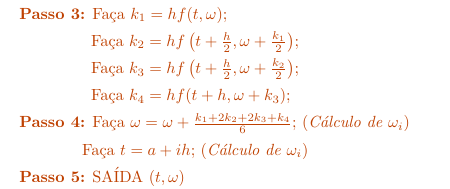

#### <font color='darkpurple'> Método de Runge-Kutta de Quarta Ordem</font>

<font color='darkpurple'> Método de Runge-Kutta de Quarta Ordem: Para encontrar uma aproximação da solução do problema de valor inicial<br><br>
 $$y' = f(t,y), \ \ \ a \leq t \leq b, \ \ \ y(a) = \alpha,$$<br>
 em $N+1$ números igualmente espaçados no intervalo $[a,b]$.<br><br>
 **ENTRADAS:** função $f$; derivada $f'$; extremidades $a$, $b$; número inteiro $N$; condição inicial $\alpha$.<br><br>
 **SAÍDA:** aproximação $\omega$ de $y$ nos $N+1$ valores de $t$.<br><br>
 **Passo 1:** Faça $h = \frac{b-a}{N}$;<br><br>
 $\ \ \ \ \ \ \ \ \ \ \ \ \ $ Faça $t = a$;<br><br>
 $\ \ \ \ \ \ \ \ \ \ \ \ \ $ Faça $\omega = \alpha$<br><br>
 $\ \ \ \ \ \ \ \ \ \ \ \ \ $ SAÍDA $(t,\omega)$<br><br>
 **Passo 2:** Para $i=1,2, \ldots, N$ execute os Passos $3$ e $4$;<br><br>
 $\ \ \ $ **Passo 3:** Faça $k_{1} = hf(t,w)$;<br><br>
 $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $ Faça $k_{2} = hf\left(t + \frac{h}{2}, \omega + \frac{k_{1}}{2}\right)$;<br><br>
 $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $ Faça $k_{3} = hf\left(t + \frac{h}{2}, \omega + \frac{k_{2}}{2}\right)$;<br><br>
 $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $ Faça $k_{4} = hf(t + h, \omega + k_{3})$;<br><br>
 $\ \ \ $ **Passo 4:** Faça $\omega  = \omega + \frac{k_{1}+2k_{2}+2k_{3} + k_{4}}{6}$ (*Calcule $\omega_{i}$*);<br><br>
 $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $ Faça $t = a + ih$;(*Calcule $t_{i}$*)<br><br>
 $\ \ \ $ **Passo 5:** SAÍDA $(t,\omega)$<br><br>
 **Passo 6:** PARE.

#### <font color='darkblue'> Código Python: Método de Runge-Kutta de Quarta Ordem</font>

In [17]:
def runge_kutta_4(f, a, b, w0, n):
    F = lambda t, y: eval(f)
    a = float(a)
    b = float(b)
    w0 = float(w0)
    n = int(n)

    h = (b - a) / n
    t = a
    w = w0
    i = 1
    print(f'Uma aproximação discreta de {n} passos para o PVI  y´={f},  {a} <= t <= {b},  y({a}) = {w0},  via método'
          f' de Runge-Kutta de Ordem 4, é dada por:')
    print(f'   i            w_i')
    print(f'   %d     %0.13f' % (i - 1, w))
    while i <= n:
        k1 = h * F(t, w)
        k2 = h * F(t + h / 2, w + k1 / 2)
        k3 = h * F(t + h / 2, w + k2 / 2)
        k4 = h * F(t + h, w + k3)
        w = w + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t = a + i * h
        i = i + 1
        print(f'   %d     %0.13f' % (i - 1, w))

In [18]:
runge_kutta_4('y-t**2+1',0,0.4,0.5,2)

Uma aproximação discreta de 2 passos para o PVI  y´=y-t**2+1,  0.0 <= t <= 0.4,  y(0.0) = 0.5,  via método de Runge-Kutta de Ordem 4, é dada por:
   i            w_i
   0     0.5000000000000
   1     0.8292933333333
   2     1.2140762106667


# <div style="margin-top: -20px;">
<hr style="border: 2px solid black;">

<font color='black'><span style="font-size: 22px;"><strong>Exercícios</strong></span></font>

<hr style="border: 2px solid black;">
</div>

#### Exercício 1

Use o método do Ponto Médio para obter uma aproximação para cada um dos seguintes problemas de valor inicial. Calcule o valor exato e o erro em cada passo a partir da solução fornecida.

a) $y' = te^{3t}-2y, \ \ \ 0 \leq t \leq 1, \ \ \ y(0) = 0, \ \ \ h=0.5.$ (Solução: $y(t) = \frac{1}{25}e^{-2t} \left(1 + e^{5t}(-1 + 5t)\right)$)

b $y' = 1 + (t-y)^{2}, \ \ \ 2 \leq t \leq 3, \ \ \ y(2) = 1, \ \ \ h=0.5.$ (Solução: $y(t) = \frac{t^{2}-t-1}{t-1}$)

c) $y' = cos(2t) + sen(3t), \ \ \ 0 \leq t \leq 1, \ \ \ y(0) = 1, \ \ \ h=0.25.$ (Solução: $y(t) = \frac{1}{6}(3sen(2t) - 2cos(3t) + 8)$)

#### Exercício 2

Repita o **Exercício 1** usando o método de Runge-Kutta de Quarta Ordem.

# <div style="margin-top: -20px;">
<hr style="border: 2px solid black;">

<font color='black'><span style="font-size: 22px;"><strong>Respostas dos Exercícios</strong></span></font>

<hr style="border: 2px solid black;">
</div>

#### Resposta do Exercício 1

$\text{a)} \ \ \ \begin{array}{ccccc}
i  & t_{i}  & w_{i}  	& y(t_{i}) & |y(t_{i})-w_{i}|\\
1  & 0.5    & 0.264625002076584  	& 0.283616521867142 & 1.899151979055796e-02\\
2  & 1.0    & 3.130002305880481  	& 3.219099319039491 & 8.909701315901009e-02\\
\end{array}
$

$\text{b)} \ \ \ \begin{array}{ccccc}
i  & t_{i}  & w_{i}  	& y(t_{i}) & |y(t_{i})-w_{i}|\\
1  & 2.5    & 1.781250000000000  	& 1.833333333333333 & 5.208333333333304e-02\\
2  & 3.0    & 2.455063849687576  	& 2.500000000000000 & 4.493615031242415e-02\\
\end{array}
$

$\text{c)} \ \ \ \begin{array}{ccccc}
i  & t_{i}    & w_{i}  	& y(t_{i}) & |y(t_{i})-w_{i}|\\
1  & 0.25    & 1.333796237699173  	& 1.329149813010828 & 4.646424688345085e-03\\
2  & 0.50    & 1.742285353442402  	& 1.730489758514714 & 1.179559492768800e-02\\
3  & 0.75    & 2.059637389443643  	& 2.041472034209607 & 1.816535523403617e-02\\
4  & 1.00    & 2.138555950183792  	& 2.117979545612989 & 2.057640457080279e-02\\
\end{array}$

#### Resposta do Exercício 2

$\text{a)} \ \ \ \begin{array}{ccccc}
i  & t_{i}  & w_{i}  	& y(t_{i}) & |y(t_{i})-w_{i}|\\
1  & 0.5    & 0.296997462129329 	& 0.283616521867142 & 1.338094026218700e-02\\
2  & 1.0    & 3.314311777477845  	& 3.219099319039491 & 9.521245843835358e-02\\
\end{array}$

$\text{b)} \ \ \ \begin{array}{ccccc}
i  & t_{i}  & w_{i}  	& y(t_{i}) & |y(t_{i})-w_{i}|\\
1  & 2.5    & 1.833323360731204   	& 1.833333333333333 & 9.972602128982544e-06\\
2  & 3.0    & 2.499971193426182  	& 2.500000000000000 & 2.880657381787444e-05\\
\end{array}$

$\text{c)} \ \ \ \begin{array}{ccccc}
i  & t_{i}    & w_{i}  	& y(t_{i}) & |y(t_{i})-w_{i}|\\
1  & 0.25    & 1.329165046879186  	& 1.329149813010828 & 1.523386835811102e-05 \\
2  & 0.50    & 1.730533566307418  	& 1.730489758514714 & 4.380779270385382e-05 \\
3  & 0.75    & 2.041543577434405  	& 2.041472034209607 & 7.154322479818731e-05\\
4  & 1.00    & 2.118063600014019  	& 2.117979545612989 & 8.405440103009809e-05\\
\end{array}$

# <div style="margin-top: -20px;">
<hr style="border: 2px solid black;">

<font color='black'><span style="font-size: 22px;"><strong>Vídeo Aulas</strong></span></font>

<hr style="border: 2px solid black;">
</div>

Clicando nos links a seguir você será redirecionado às aulas referentes a este capítulo:

[Polinômio de Taylor de Ordem Superior (Duas Variáveis)](https://youtu.be/juV4AXGgOP0)

[Método do Ponto Médio](https://youtu.be/8As3RFfaH24)

[Exemplo Envolvendo o Método do Ponto Médio](https://youtu.be/YBPEh0eQpzU)

[Método de Runge-Kutta de Quarta Ordem](https://youtu.be/n_kD0qKkirg)